## **1-Import libraries**

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **2-Load Helper Function**

In [2]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2022-04-05 17:59:32--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-04-05 17:59:32 (95.1 MB/s) - ‘helper_functions.py’ saved [10246/10246]



## **3-Import Functions Using Helper Functions**

In [3]:
# Import series of helper functions for our notebook
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, compare_historys, walk_through_dir

## **4-Install and Import Split Folders**

In [4]:
pip install split-folders

In [5]:
import splitfolders

## **5-Mount Data From Google Drive**

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **6-Load Data from Google Drive**

In [7]:
import zipfile

# unzip the downloaded file
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Deep_Learning_Datasets_For_Practice_Purposes/Apple_Corn_and_Grape_dataset.zip")
zip_ref.extractall()
zip_ref.close()

## **7-Get Class Names Programmatically**

In [8]:
# get the class names prgrammatically
import pathlib
import numpy as np
data_dir = pathlib.Path("/content/Apple_Corn_and_Grape_dataset")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # create a list of class_names from the subdirectories
print(class_names)

['Apple___Apple_scab' 'Apple___Black_rot' 'Apple___Cedar_apple_rust'
 'Apple___healthy' 'Corn___Cercospora_leaf_spot Gray_leaf_spot'
 'Corn___Common_rust' 'Corn___Northern_Leaf_Blight' 'Corn___healthy'
 'Grape___Black_rot' 'Grape___Esca_(Black_Measles)'
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)' 'Grape___healthy']


## **8-Visualize Our Images**

In [9]:
# let's visualize our image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

def view_random_image(target_dir, target_class):
  # setup the target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # get a random image path
  random_image = random.sample(os.listdir(target_folder), 1) # this line means randomly sample one item form the target folder
  print(random_image)

  # read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}") # show thw shape of the image

  return img 

## **9-Split The Folders into Train , Validation and Test Datasets**

In [10]:
splitfolders.ratio("/content/Apple_Corn_and_Grape_dataset", output="apple_corn_grape_dataset_splitting",
    seed=1337, ratio=(.8, .1, .1), group_prefix=None, move=False)

Copying files: 12000 files [00:04, 2685.14 files/s]


## **10-Set Train, Test and Validation Paths**

In [70]:
train_dir = "/content/apple_corn_grape_dataset_splitting/train/"
test_dir = '/content/apple_corn_grape_dataset_splitting/test/'
val_dir = '/content/apple_corn_grape_dataset_splitting/val/'

## **11-Checking Number of Images**

In [12]:
# How many images/classes are there?
walk_through_dir("/content/Apple_Corn_and_Grape_dataset")

There are 12 directories and 0 images in '/content/Apple_Corn_and_Grape_dataset'.
There are 0 directories and 1000 images in '/content/Apple_Corn_and_Grape_dataset/Corn___Common_rust'.
There are 0 directories and 1000 images in '/content/Apple_Corn_and_Grape_dataset/Apple___Apple_scab'.
There are 0 directories and 1000 images in '/content/Apple_Corn_and_Grape_dataset/Apple___healthy'.
There are 0 directories and 1000 images in '/content/Apple_Corn_and_Grape_dataset/Grape___Black_rot'.
There are 0 directories and 1000 images in '/content/Apple_Corn_and_Grape_dataset/Corn___Northern_Leaf_Blight'.
There are 0 directories and 1000 images in '/content/Apple_Corn_and_Grape_dataset/Apple___Black_rot'.
There are 0 directories and 1000 images in '/content/Apple_Corn_and_Grape_dataset/Grape___Esca_(Black_Measles)'.
There are 0 directories and 1000 images in '/content/Apple_Corn_and_Grape_dataset/Corn___Cercospora_leaf_spot Gray_leaf_spot'.
There are 0 directories and 1000 images in '/content/App

## **12-Set Data Inputs**

In [13]:
# Set up data inputs
import tensorflow as tf
IMG_SIZE = (224, 224)
train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                                label_mode="categorical",
                                                                                image_size=IMG_SIZE)
test_data =  tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                 label_mode="categorical",
                                                                 image_size=IMG_SIZE,
                                                                 shuffle=False) # don't shuffle test data for prediction analysis

Found 9600 files belonging to 12 classes.
Found 1200 files belonging to 12 classes.


## **13-Create Checkpoint Callback**

In [14]:

# Create a checkpoint callback
checkpoint_path = "apple_corn_grapes_leaf_dataset_model"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                         save_weights_only=True,
                                                         monitor="val_accuracy",
                                                         save_best_only=True)

## **14-Make Data Augmentation**

In [15]:
# Create a data augmentation layer to incorporate it right into the model
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential

# Setup data augmentation
data_augmentation = Sequential([
   preprocessing.RandomFlip("horizontal"),
   preprocessing.RandomRotation(0.2),
   preprocessing.RandomHeight(0.2),
   preprocessing.RandomWidth(0.2),
   preprocessing.RandomZoom(0.2),
  # preprocessing.Rescaling(1/255.)  # rescale inputs of images between 1 & 0, required for models like ResNet50                            
], name= "data_augmentation")


## **15-Setup Base Model (Feature Extraction)**

In [16]:
# Setup a base model and freeze its layer (this will extract features)
base_model = tf.keras.applications.EfficientNetV2B0(include_top=False)
base_model.trainable = False

# Setup a model architecture with trainable top layers
inputs = layers.Input(shape=(224, 224, 3), name="input_layer")
x = data_augmentation(inputs) # augment layers (only happens during trainable phase)
x = base_model(x, training=False) # put the base model in interface mode so weights which needs to be frozen, stay frozen
x = layers.GlobalAveragePooling2D(name="global_avg_pooling_layer")(x)
outputs = layers.Dense(len(train_data.class_names), activation="softmax", name="output_layer")(x)
model=tf.keras.Model(inputs, outputs)

24289280/24274472 [==============================] - 0s 0us/step


In [17]:
# Get a summary of model we've been created
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, 224, 224, 3)      0         
 al)                                                             
                                                                 
 efficientnetv2-b0 (Function  (None, None, None, 1280)  5919312  
 al)                                                             
                                                                 
 global_avg_pooling_layer (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 output_layer (Dense)        (None, 12)                15372     
                                                             

## **16-Import Metrics**

In [18]:
from tensorflow.keras import metrics

In [19]:
METRICS = [
  metrics.TruePositives(name="tp"),
  metrics.FalsePositives(name="fp"),
  metrics.TrueNegatives(name="tn"),
  metrics.FalseNegatives(name="fn"),
  metrics.CategoricalAccuracy(name="accuracy"),
  metrics.Precision(name="precision"),
  metrics.Recall(name="recall"),
  metrics.AUC(name="auc")
]

## **17-Compile and Fit The Model**

In [20]:
# Compile
model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=METRICS)

# Fit
history_for_feature_extraction = model.fit(train_data,
                                           epochs=5, # fit to 5 epochs to keep experiment quick
                                           validation_data=test_data,
                                           validation_steps=int(0.15 * len(test_data)), # validate on only 15% of test data during training 
                                           callbacks=[checkpoint_callback])

Epoch 1/5
300/300 [==============================] - 159s 464ms/step - loss: 0.6376 - tp: 6334.0000 - fp: 299.0000 - tn: 105301.0000 - fn: 3266.0000 - accuracy: 0.8556 - precision: 0.9549 - recall: 0.6598 - auc: 0.9898 - val_loss: 0.4626 - val_tp: 124.0000 - val_fp: 8.0000 - val_tn: 1752.0000 - val_fn: 36.0000 - val_accuracy: 0.8750 - val_precision: 0.9394 - val_recall: 0.7750 - val_auc: 0.9937
Epoch 2/5
300/300 [==============================] - 99s 330ms/step - loss: 0.2183 - tp: 8841.0000 - fp: 365.0000 - tn: 105235.0000 - fn: 759.0000 - accuracy: 0.9470 - precision: 0.9604 - recall: 0.9209 - auc: 0.9988 - val_loss: 0.3355 - val_tp: 135.0000 - val_fp: 9.0000 - val_tn: 1751.0000 - val_fn: 25.0000 - val_accuracy: 0.8938 - val_precision: 0.9375 - val_recall: 0.8438 - val_auc: 0.9956
Epoch 3/5
300/300 [==============================] - 85s 282ms/step - loss: 0.1594 - tp: 9092.0000 - fp: 328.0000 - tn: 105272.0000 - fn: 508.0000 - accuracy: 0.9570 - precision: 0.9652 - recall: 0.9471 - a

## **18-Evaluate The Model**

In [21]:
# Evaluate on the whole test dataset  ##its a feature extraction instead of fine tune
feature_extraction_results = model.evaluate(test_data)
feature_extraction_results

38/38 [==============================] - 5s 137ms/step - loss: 0.1150 - tp: 1151.0000 - fp: 41.0000 - tn: 13159.0000 - fn: 49.0000 - accuracy: 0.9625 - precision: 0.9656 - recall: 0.9592 - auc: 0.9990


[0.11502294987440109,
 1151.0,
 41.0,
 13159.0,
 49.0,
 0.9624999761581421,
 0.9656040072441101,
 0.9591666460037231,
 0.998977780342102]

## **19-Plot The Graph**

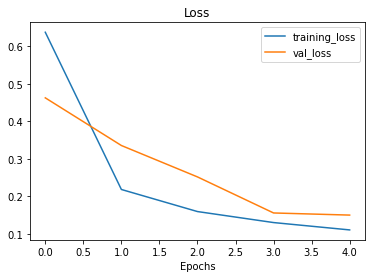

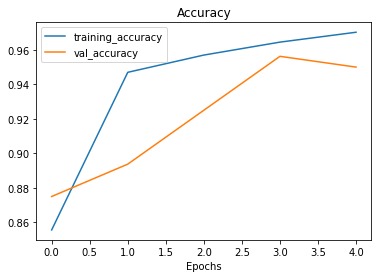

In [22]:
plot_loss_curves(history_for_feature_extraction)

## **20-Unfreeze Some Layers**

In [23]:
# Unfreeze all of the layers in base model
base_model.trainable=True

# Refreeze every layer except the last 5 layer 
for layer in base_model.layers[:-5]:
  layer.trainable=False

## **21-Recompile and Fit The Model**

In [24]:
# Recompile model with lower learning rate (it's typically best practice to lower the learning rate when fine-tuning)
model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), # learning rate lower by 10x
              metrics=METRICS)

In [25]:
# What layers in the model are trainable?
for layer in model.layers:
  print(layer.name, layer.trainable)

input_layer True
data_augmentation True
efficientnetv2-b0 True
global_avg_pooling_layer True
output_layer True


In [26]:
# Check which layers in our model is trainable
for layer_number, layer in enumerate(model.layers[2].layers):
  print(layer_number, layer.name, layer.trainable )

0 input_1 False
1 rescaling False
2 normalization False
3 stem_conv False
4 stem_bn False
5 stem_activation False
6 block1a_project_conv False
7 block1a_project_bn False
8 block1a_project_activation False
9 block2a_expand_conv False
10 block2a_expand_bn False
11 block2a_expand_activation False
12 block2a_project_conv False
13 block2a_project_bn False
14 block2b_expand_conv False
15 block2b_expand_bn False
16 block2b_expand_activation False
17 block2b_project_conv False
18 block2b_project_bn False
19 block2b_add False
20 block3a_expand_conv False
21 block3a_expand_bn False
22 block3a_expand_activation False
23 block3a_project_conv False
24 block3a_project_bn False
25 block3b_expand_conv False
26 block3b_expand_bn False
27 block3b_expand_activation False
28 block3b_project_conv False
29 block3b_project_bn False
30 block3b_add False
31 block4a_expand_conv False
32 block4a_expand_bn False
33 block4a_expand_activation False
34 block4a_dwconv2 False
35 block4a_bn False
36 block4a_activation 

In [27]:
# Fine-tune for more 5 epochs
fine_tune_epochs = 10 # model has already done the 5 epochs (feature extraction), this is the total number of epochs we're after (5 + 5 =10)

# Fine-tune our model
history_for_fine_tune = model.fit(train_data,
                                                     epochs=fine_tune_epochs,
                                                     validation_data=test_data,
                                                     validation_steps=int(0.15 * len(test_data)),
                                                     initial_epoch=history_for_feature_extraction.epoch[-1])

Epoch 5/10
300/300 [==============================] - 81s 236ms/step - loss: 0.0907 - tp: 10463.0000 - fp: 285.0000 - tn: 118515.0000 - fn: 337.0000 - accuracy: 0.9714 - precision: 0.9735 - recall: 0.9688 - auc: 0.9995 - val_loss: 0.0924 - val_tp: 154.0000 - val_fp: 6.0000 - val_tn: 1754.0000 - val_fn: 6.0000 - val_accuracy: 0.9625 - val_precision: 0.9625 - val_recall: 0.9625 - val_auc: 0.9997
Epoch 6/10
300/300 [==============================] - 65s 215ms/step - loss: 0.0754 - tp: 9349.0000 - fp: 219.0000 - tn: 105381.0000 - fn: 251.0000 - accuracy: 0.9757 - precision: 0.9771 - recall: 0.9739 - auc: 0.9997 - val_loss: 0.0676 - val_tp: 155.0000 - val_fp: 4.0000 - val_tn: 1756.0000 - val_fn: 5.0000 - val_accuracy: 0.9688 - val_precision: 0.9748 - val_recall: 0.9688 - val_auc: 0.9999
Epoch 7/10
300/300 [==============================] - 64s 212ms/step - loss: 0.0686 - tp: 9378.0000 - fp: 204.0000 - tn: 105396.0000 - fn: 222.0000 - accuracy: 0.9777 - precision: 0.9787 - recall: 0.9769 - a

## **22-Re_Evaluate The Model**

In [28]:
# Evaluate on the whole test dataset
fine_tune_results =model.evaluate(test_data)
fine_tune_results

38/38 [==============================] - 5s 127ms/step - loss: 0.0649 - tp: 1174.0000 - fp: 26.0000 - tn: 13174.0000 - fn: 26.0000 - accuracy: 0.9783 - precision: 0.9783 - recall: 0.9783 - auc: 0.9993


[0.06486237794160843,
 1174.0,
 26.0,
 13174.0,
 26.0,
 0.9783333539962769,
 0.9783333539962769,
 0.9783333539962769,
 0.9993224143981934]

## **23-Compare Histories**

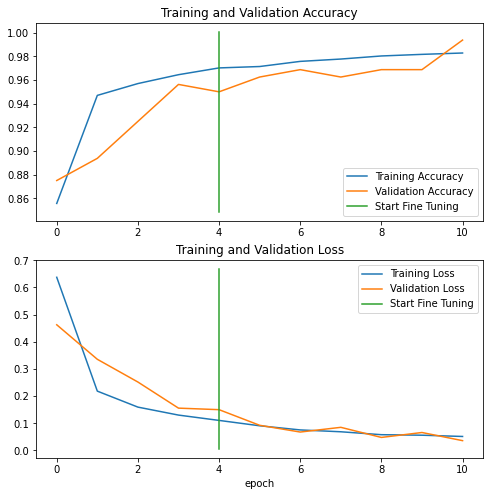

In [29]:
# Compare the historys of feature extraction model with fine-tuning model 
compare_historys(original_history=history_for_feature_extraction,
                 new_history=history_for_fine_tune,
                 initial_epochs=5)

## **24-Save The Model**

In [30]:
# Save our fine-tuning model
model.save("drive/MyDrive/apple_corn_grape_dataset_model.h5")

## **25-Load The Model**

In [31]:
# Load and evaluate saved model
loaded_model =tf.keras.models.load_model("drive/MyDrive/apple_corn_grape_dataset_model.h5")

In [32]:
# Evaluate loaded model and compare performance to pre-saved model
loaded_model_results = loaded_model.evaluate(test_data)
loaded_model_results

38/38 [==============================] - 7s 121ms/step - loss: 0.0649 - tp: 1174.0000 - fp: 26.0000 - tn: 13174.0000 - fn: 26.0000 - accuracy: 0.9783 - precision: 0.9783 - recall: 0.9783 - auc: 0.9993


[0.06486237794160843,
 1174.0,
 26.0,
 13174.0,
 26.0,
 0.9783333539962769,
 0.9783333539962769,
 0.9783333539962769,
 0.9993224143981934]

In [33]:
# The results from the saved model (Above) should be very similar to the results below
fine_tune_results

[0.06486237794160843,
 1174.0,
 26.0,
 13174.0,
 26.0,
 0.9783333539962769,
 0.9783333539962769,
 0.9783333539962769,
 0.9993224143981934]

## **26-Make Prediction Probabilites**

In [34]:
# Make predictions with model
preds_probs = model.predict(test_data, verbose=1) # set verbosity to see how long it left

38/38 [==============================] - 6s 105ms/step


In [35]:
len(test_data)

38

In [36]:
# How many predictions are there?
len(preds_probs)

1200

In [37]:
# What's the shape of our predictions?
preds_probs.shape

(1200, 12)

In [38]:
# Let's see whats the first 10 predictions looks like
preds_probs[:10]

array([[9.86501038e-01, 1.15430644e-02, 7.32819724e-04, 1.21302530e-03,
        1.00772650e-06, 3.74326191e-06, 2.80196468e-06, 6.92933270e-07,
        2.24244392e-08, 4.55175837e-07, 8.44825536e-07, 5.00738281e-07],
       [8.86408448e-01, 3.01768091e-06, 1.96800311e-03, 1.11536108e-01,
        2.47731222e-08, 2.01684696e-08, 3.47690866e-06, 7.21649229e-08,
        6.62473831e-05, 4.74675380e-06, 7.24197719e-07, 8.98334019e-06],
       [9.94423091e-01, 1.78202839e-07, 3.34806202e-07, 5.52815106e-03,
        7.37182191e-08, 3.86059540e-09, 4.74121589e-05, 1.70558536e-08,
        3.25958439e-07, 3.30429742e-07, 1.40113565e-09, 1.13959775e-09],
       [9.47320879e-01, 2.10700417e-03, 1.68220358e-05, 5.04312031e-02,
        3.47960349e-06, 8.58791793e-07, 1.18933778e-04, 1.79520868e-07,
        1.72149313e-07, 3.44533277e-07, 6.83728674e-09, 8.00657176e-08],
       [9.74818647e-01, 1.53717399e-03, 2.33939625e-02, 1.70761923e-04,
        3.34851734e-07, 2.95411519e-05, 4.18785494e-05, 4.40

In [39]:
# What does the first prediction probability array look like?
preds_probs[0], len(preds_probs[0]), sum(preds_probs[0])

(array([9.8650104e-01, 1.1543064e-02, 7.3281972e-04, 1.2130253e-03,
        1.0077265e-06, 3.7432619e-06, 2.8019647e-06, 6.9293327e-07,
        2.2424439e-08, 4.5517584e-07, 8.4482554e-07, 5.0073828e-07],
       dtype=float32), 12, 1.0000000165292082)

In [40]:
# We get one prediction probability per class(in our case there's 101 prediction probabilities)
print(f"Number of prediction probabilites for sample 0: {len(preds_probs[0])}")
print(f"What prediction probabilites sample 0 looks like:\n {preds_probs[0]}")
print(f"The class with highest predicted probability by the model for sample 0: {preds_probs[0].argmax()}")


Number of prediction probabilites for sample 0: 12
What prediction probabilites sample 0 looks like:
 [9.8650104e-01 1.1543064e-02 7.3281972e-04 1.2130253e-03 1.0077265e-06
 3.7432619e-06 2.8019647e-06 6.9293327e-07 2.2424439e-08 4.5517584e-07
 8.4482554e-07 5.0073828e-07]
The class with highest predicted probability by the model for sample 0: 0


In [41]:
# Get the pred classes of each model
pred_classes = preds_probs.argmax(axis=1)

# How do they look like?
pred_classes[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [42]:
# How many pred classes we have?
len(pred_classes)

1200

In [43]:
# To get our test dataset labels we need to unravel our test_data BatchDataset
y_labels = []
for images, labels in test_data.unbatch():
  y_labels.append(labels.numpy().argmax()) # currently test labels look like: [0, 0, 0, 1,.....0,0], we want the index value where the index value "1" occurs
y_labels[:10] # look at the first 10 

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [44]:
# How many y_labels are there?
len(y_labels)

1200

In [45]:
test_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 12), dtype=tf.float32, name=None))>

In [46]:
len(test_data)

38

## **27-Make Confusion Matrix**

In [47]:
from helper_functions import make_confusion_matrix

In [48]:
# Get a list of class names
class_names =test_data.class_names
class_names[:10]

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Corn___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn___Common_rust',
 'Corn___Northern_Leaf_Blight',
 'Corn___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)']

In [49]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# We need to make some changes to our make_confusion_matrix function to ensure the x-label print verticaly
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15, norm=False, savefig=False): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
    norm: normalize values or not (default=False).
    savefig: save confusion matrix to file (default=False).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  ### changes (x-labels vertically) ###
  plt.xticks(rotation=70, fontsize=text_size)
  plt.yticks(fontsize=text_size)

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    if norm:
      plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)
    else:
      plt.text(j, i, f"{cm[i, j]}",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)

  # Save the figure to the current working directory
  if savefig:
    fig.savefig("confusion_matrix.png")

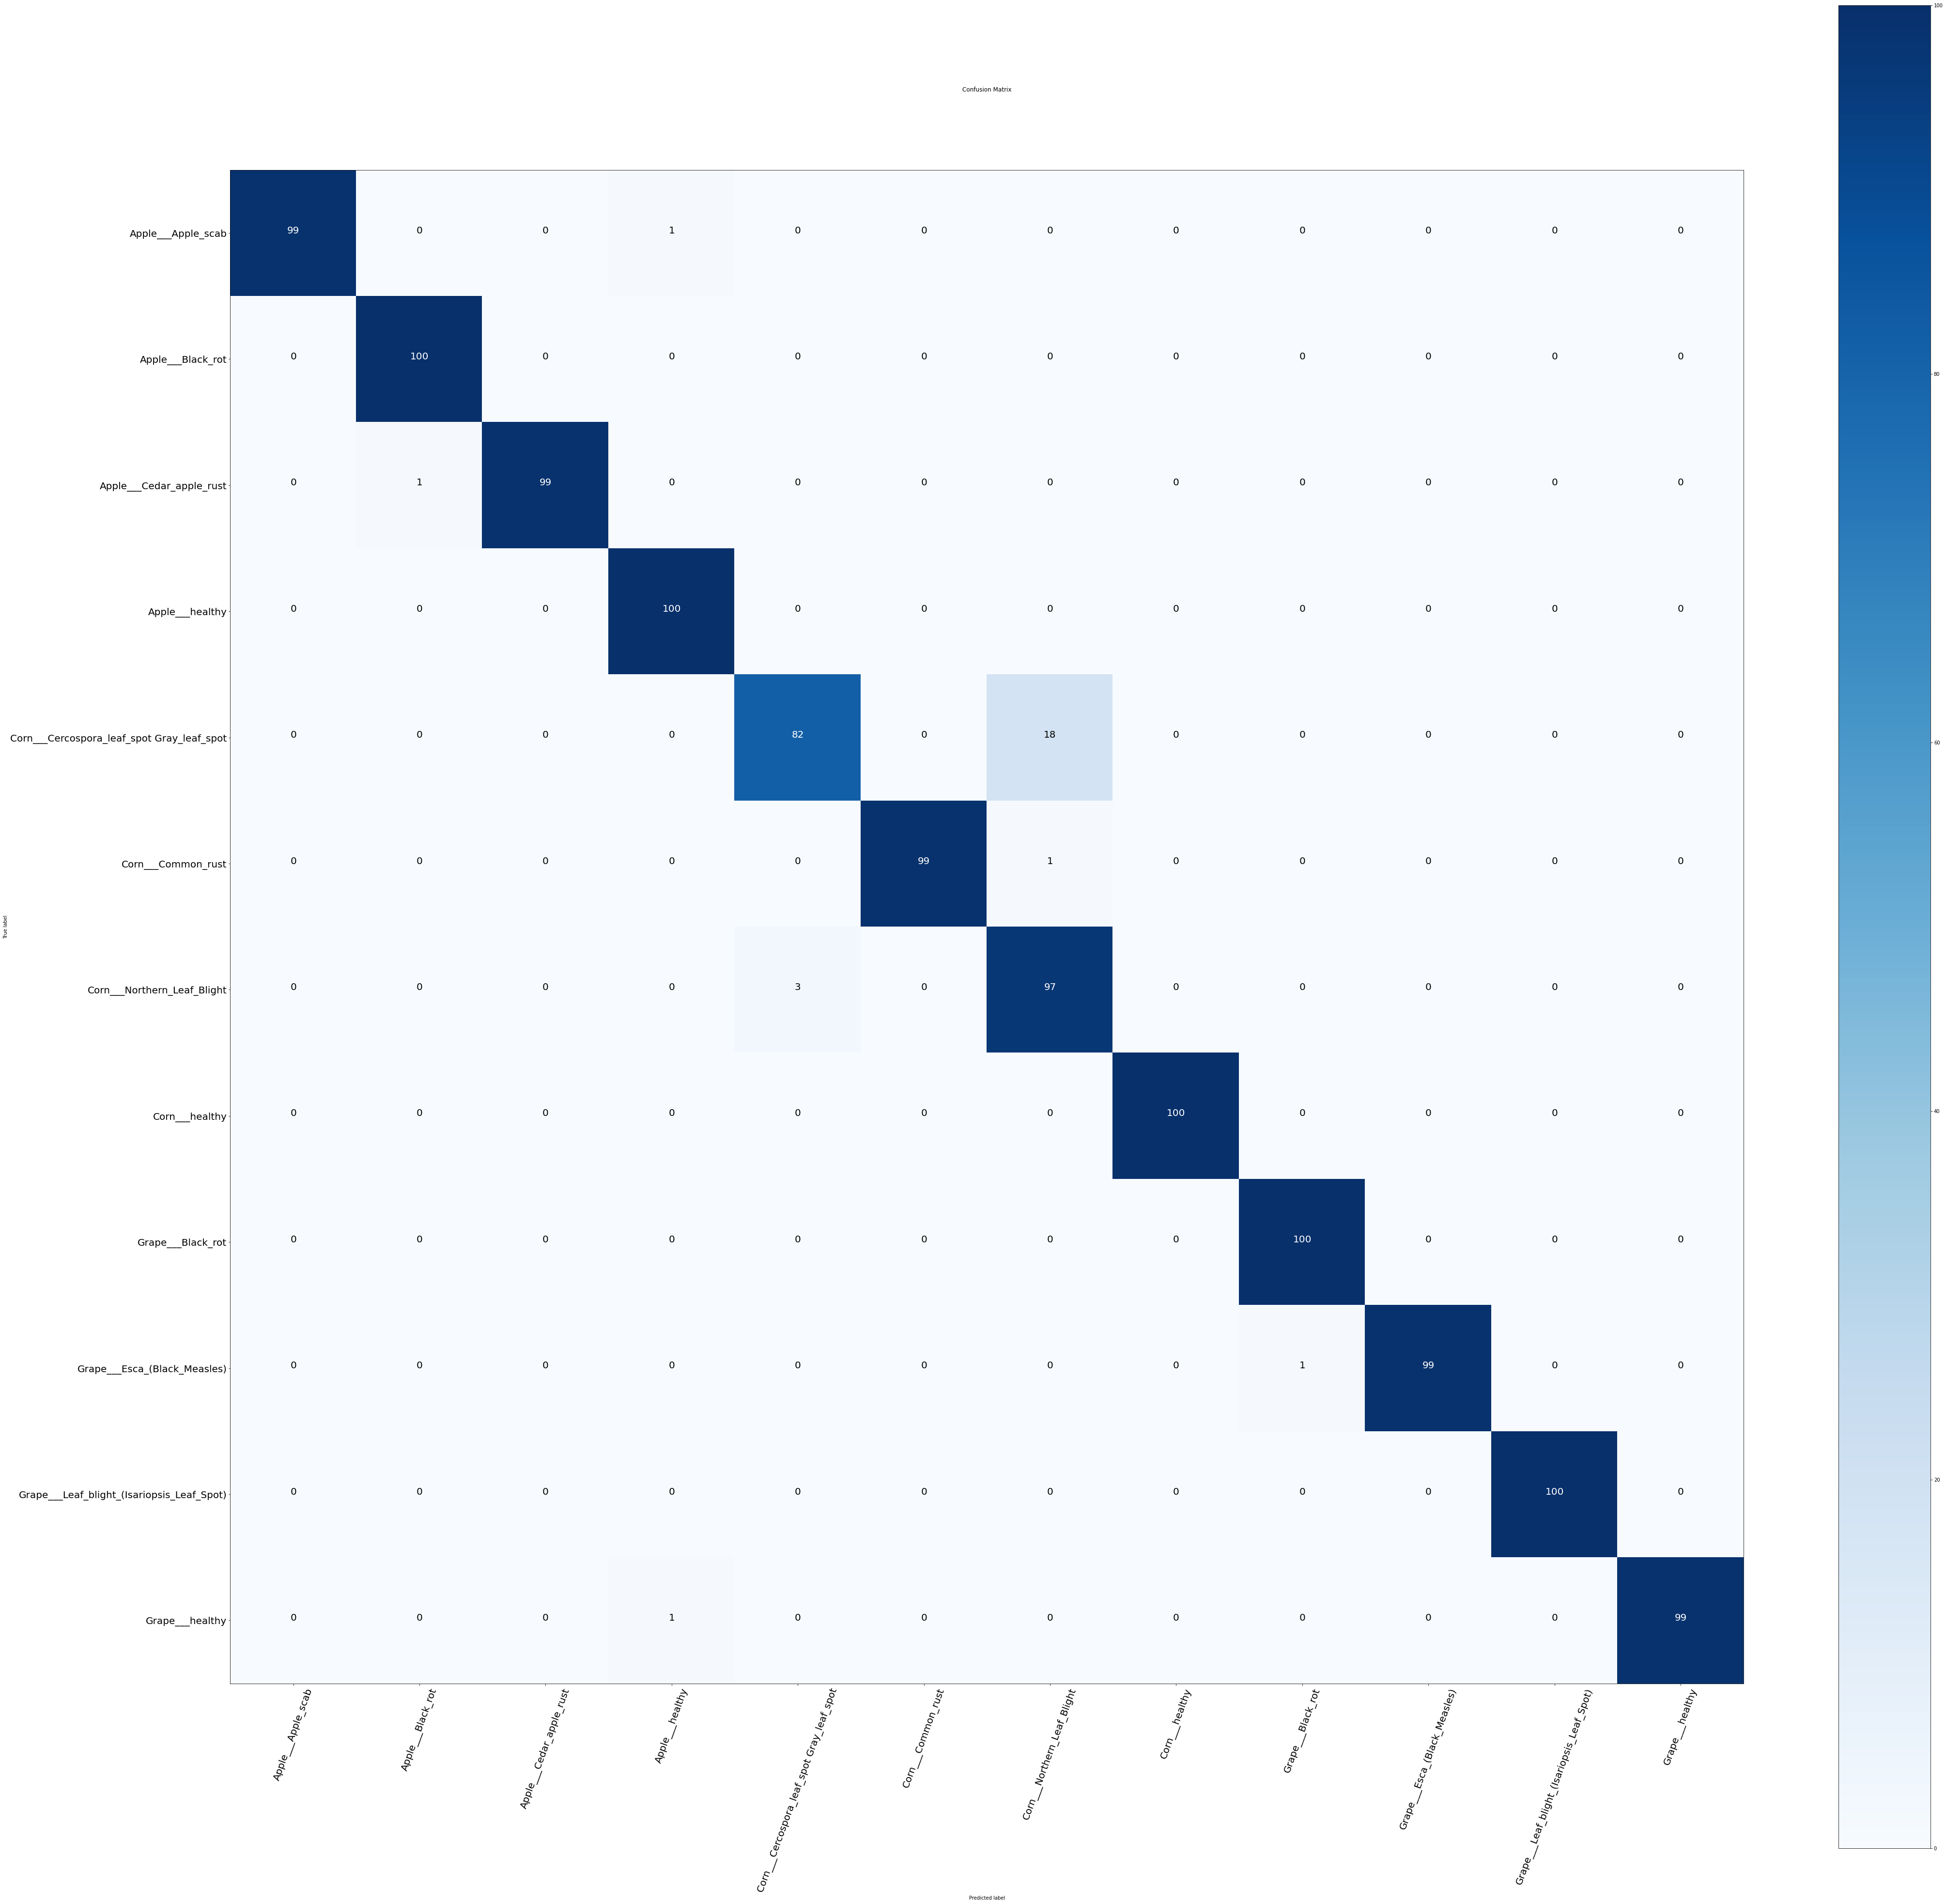

In [58]:
make_confusion_matrix(y_true=y_labels,
                       y_pred=pred_classes,
                       classes=class_names,
                      figsize=(70, 70),
                      text_size=20,
                      savefig=True)

## **28-Make Classification Report**

In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_true=y_labels,
                            y_pred=pred_classes))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       100
           1       0.99      1.00      1.00       100
           2       1.00      0.99      0.99       100
           3       0.98      1.00      0.99       100
           4       0.96      0.82      0.89       100
           5       1.00      0.99      0.99       100
           6       0.84      0.97      0.90       100
           7       1.00      1.00      1.00       100
           8       0.99      1.00      1.00       100
           9       1.00      0.99      0.99       100
          10       1.00      1.00      1.00       100
          11       1.00      0.99      0.99       100

    accuracy                           0.98      1200
   macro avg       0.98      0.98      0.98      1200
weighted avg       0.98      0.98      0.98      1200



In [60]:
# Get a dictionary of the classification report
classification_report_dict = classification_report(y_labels, pred_classes, output_dict=True)
classification_report_dict

{'0': {'f1-score': 0.9949748743718593,
  'precision': 1.0,
  'recall': 0.99,
  'support': 100},
 '1': {'f1-score': 0.9950248756218906,
  'precision': 0.9900990099009901,
  'recall': 1.0,
  'support': 100},
 '10': {'f1-score': 1.0, 'precision': 1.0, 'recall': 1.0, 'support': 100},
 '11': {'f1-score': 0.9949748743718593,
  'precision': 1.0,
  'recall': 0.99,
  'support': 100},
 '2': {'f1-score': 0.9949748743718593,
  'precision': 1.0,
  'recall': 0.99,
  'support': 100},
 '3': {'f1-score': 0.99009900990099,
  'precision': 0.9803921568627451,
  'recall': 1.0,
  'support': 100},
 '4': {'f1-score': 0.8864864864864864,
  'precision': 0.9647058823529412,
  'recall': 0.82,
  'support': 100},
 '5': {'f1-score': 0.9949748743718593,
  'precision': 1.0,
  'recall': 0.99,
  'support': 100},
 '6': {'f1-score': 0.8981481481481481,
  'precision': 0.8362068965517241,
  'recall': 0.97,
  'support': 100},
 '7': {'f1-score': 1.0, 'precision': 1.0, 'recall': 1.0, 'support': 100},
 '8': {'f1-score': 0.99502

In [61]:
class_names[3]

'Apple___healthy'

In [62]:
classification_report_dict["3"]["f1-score"]

0.99009900990099

In [63]:
# Create empty dictionary
class_f1_scores = {}
# Loop through classification report dictionary items
for k, v in classification_report_dict.items():
  if k == "accuracy": # stop once we get to accuracy key
    break
  else:
     # Add names and f1-scores to new dictionary
     class_f1_scores[class_names[int(k)]] = v["f1-score"]
class_f1_scores     


{'Apple___Apple_scab': 0.9949748743718593,
 'Apple___Black_rot': 0.9950248756218906,
 'Apple___Cedar_apple_rust': 0.9949748743718593,
 'Apple___healthy': 0.99009900990099,
 'Corn___Cercospora_leaf_spot Gray_leaf_spot': 0.8864864864864864,
 'Corn___Common_rust': 0.9949748743718593,
 'Corn___Northern_Leaf_Blight': 0.8981481481481481,
 'Corn___healthy': 1.0,
 'Grape___Black_rot': 0.9950248756218906,
 'Grape___Esca_(Black_Measles)': 0.9949748743718593,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 1.0,
 'Grape___healthy': 0.9949748743718593}

In [64]:
# Turn f1 scores into Dataframe visualization
import pandas as pd
f1_scores =pd.DataFrame({"class_names": list(class_f1_scores.keys()),
                        "f1-score": list(class_f1_scores.values())}).sort_values("f1-score", ascending=False)
f1_scores                

,class_names,f1-score
7,Corn___healthy,1.000000
10,Grape___Leaf_blight_(Isariopsis_Leaf_Spot),1.000000
1,Apple___Black_rot,0.995025
8,Grape___Black_rot,0.995025
0,Apple___Apple_scab,0.994975
2,Apple___Cedar_apple_rust,0.994975
5,Corn___Common_rust,0.994975
9,Grape___Esca_(Black_Measles),0.994975
11,Grape___healthy,0.994975
3,Apple___healthy,0.990099


In [65]:
f1_scores[:2]

,class_names,f1-score
7,Corn___healthy,1.0
10,Grape___Leaf_blight_(Isariopsis_Leaf_Spot),1.0


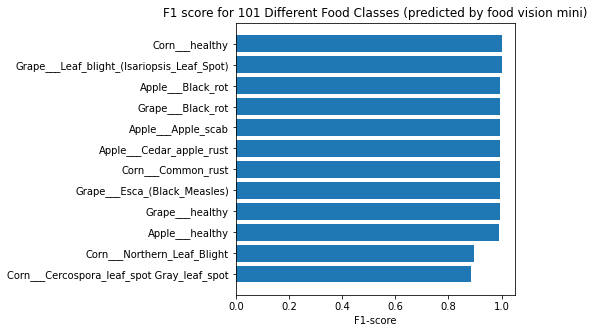

In [66]:
import matplotlib.pyplot as plt


import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5, 5))
scores = ax.barh(range(len(f1_scores)), f1_scores["f1-score"].values) # get f1-score value
ax.set_yticks(range(len(f1_scores)))
ax.set_yticklabels(f1_scores["class_names"])
ax.set_xlabel("F1-score")
ax.set_title("F1 score for 101 Different Food Classes (predicted by food vision mini)")
ax.invert_yaxis(); # reverse the order of our plot


# Challenge: add value to the end of each bar of what the actual f1-score is 
# (hint: use the "autolabel" function from here: https://matplotlib.org/2.0.2/examples/api/barchart_demo.html) 

## **29-Load and Prepare Images Function**

In [67]:
# Create a function to load and create a images
def load_and_prep_image(filename, img_shape=224, scale=True):
  """
  Read in an image from filename, turn it into a tensor and reshapes into
  specified shape (img_shape, img_shape, color_channels=3).

  Args:
    filename(str): path to target image
    image_shape(int): height/width dimension of target image size
    scale(bool): scale pixel values from 0-255 to 0-1 or not

  Returns:
    image tensor of shape (img_shape, img_shape, 3)
  """

  # Read in the image
  img = tf.io.read_file(filename)

  # Decode image into tensor
  img = tf.io.decode_image(img, channels=3) 

  # Resize the image
  img = tf.image.resize(img, [img_shape, img_shape])

  # Scale Yes/no?
  if scale:
    # reshape the image (get all value between 0 and 1)
    return img/255.
  else:
    return img # don't need to rescale image for EffiecienNet model in TensorFlow   


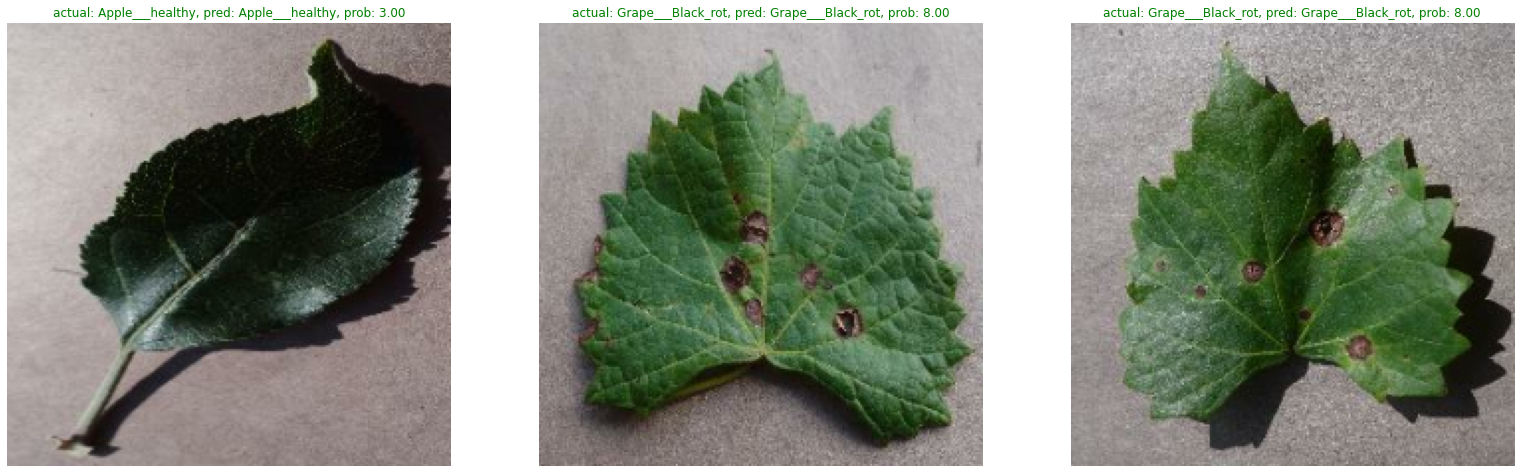

In [74]:
# Make preds on series of images
import os
import random

plt.figure(figsize=(27,20))
for i in range(3):
  # Choose a random image(s) from a random class(es)
  class_name =random.choice(class_names)
  filename = random.choice(os.listdir(val_dir + "/" + class_name))
  filepath = val_dir + class_name + "/" + filename


  # Load the image and make predictions
  img = load_and_prep_image(filepath, scale=False)
  # print(img.shape)
  img_expanded = tf.expand_dims(img, axis=0)
  # print(img_expanded.shape)
  pred_prob = model.predict(img_expanded) # get prediction probability array
  pred_class = class_names[pred_prob.argmax()] # get heighst prediction probability index and match it class_names list
  # print(pred_prob)
   # print(pred_class)

    # Plot the image(s)
  plt.subplot(1, 3, i+1)
  plt.imshow(img/255.)
  if class_name == pred_class: # if predicted class matches truth class, make text green
    title_color = "g"
  else:
    title_color ="r"
  plt.title(f"actual: {class_name}, pred: {pred_class}, prob: {pred_prob.argmax():.2f}", c=title_color)
  plt.axis(False);  

In [121]:
custom_food_images= ['/content/Grape-leaf-spot.png']

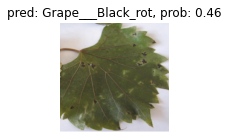

In [122]:
# Make prediction on and plot the custom food images
for img in custom_food_images:
  img = load_and_prep_image(img, scale=False) # don't need to do scale for our EfficienNetV2B0 model
  pred_prob = model.predict(tf.expand_dims(img, axis=0)) # make prediction on the image with shape [1, 224,224, 1] (same shape as model trained on)
  pred_class = class_names[pred_prob.argmax()] # get the index with heighest prediction probability
  # plot the appropriate information
  plt.figure(figsize=(2,2))
  plt.imshow(img/255.)
  plt.title(f"pred: {pred_class}, prob: {pred_prob.max():.2f}")
  plt.axis(False)